In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
df = pd.read_csv('testdnn33.csv')

In [2]:
print(df)

          발매가  브랜드  라인  콜라보  month  day  color_num  type
0      259000    3  21    0      4    0          1    ok
1      259000    3  21    0      4    1          1    ok
2      259000    3  21    0      4    2          1    ok
3      259000    3  21    0      4    3          1    ok
4      259000    3  21    0      4    4          1    ok
...       ...  ...  ..  ...    ...  ...        ...   ...
43948  209000    5  28   40     10   88          1  none
43949  209000    5  28   40     10   89          1  none
43950  209000    5  28   40     10   90          1  none
43951  209000    5  28   40     10   91          1  none
43952  209000    5  28   40     10   92          1  none

[43953 rows x 8 columns]


In [3]:
condition = (df.브랜드 == 1)

In [4]:
df2 = df.loc[condition]

In [5]:
print(df2)

          발매가  브랜드  라인  콜라보  month  day  color_num    type
9214   129000    1  29    0      1    0          2  double
9215   129000    1  29    0      1    1          2  double
9216   129000    1  29    0      1    2          2  double
9217   129000    1  29    0      1    3          2  double
9218   129000    1  29    0      1    4          2  double
...       ...  ...  ..  ...    ...  ...        ...     ...
34706  119000    1   5    0      1   87          3    none
34707  119000    1   5    0      1   88          3    none
34708  119000    1   5    0      1   89          3    none
34709  119000    1   5    0      1   90          3    none
34710  119000    1   5    0      1   91          3    none

[16405 rows x 8 columns]


In [6]:
condition2 = (df2.day == 0)

In [8]:
df3 = df2.loc[condition2]
print(df3)

          발매가  브랜드  라인  콜라보  month  day  color_num    type
9214   129000    1  29    0      1    0          2  double
9305   129000    1  29    0      1    0          3  double
9396   139000    1   1    0      1    0          3      ok
9487   219000    1  29   14      8    0          2  double
9580   119000    1  29    0      4    0          3  double
...       ...  ...  ..  ...    ...  ...        ...     ...
34252  124100    1   8    0      1    0          4    none
34343  119000    1   5    0     12    0          4      ok
34434  119000    1   8    0     10    0          3    none
34527  119000    1   5    0      9    0          3    none
34619  119000    1   5    0      1    0          3    none

[178 rows x 8 columns]


In [6]:
df2 = df2.sample(frac=1).reset_index(drop=True)

In [7]:
yx = df["type"]

In [8]:
X = df.iloc[:,0:7]
X=np.asarray(X).astype(np.int)
y = np.empty((477,3))

<ipython-input-8-3f3652b218d1>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.asarray(X).astype(np.int)


In [9]:
for i in range(477):
    if yx[i] == "none":
        y[i] = [1, 0, 0]
    elif yx[i] == "ok":
        y[i] = [0, 1, 0]
    else:
        y[i] = [0, 0, 1]

In [10]:
X_train, y_train = X[0:333], y[0:333]
X_test,  y_test  = X[333:477], y[333:477]

In [11]:
model = tf.keras.Sequential()  
model.add(layers.Dense(14, input_shape=(7,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.01))        

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(64))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) 

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy', 
    optimizer="rmsprop",   
    metrics=['accuracy'])  

In [12]:
hist = model.fit(
    X_train, y_train,
    batch_size= 10,  #5개에 한 번씩 업데이터 실행
    epochs=100,       #훈련 데이터셋을 총 100회 반복 실험. 단, 조기중지될 수 있음
    validation_split = 0.5,  
      #validation data 분할 비율. 즉, 100개 중에서 20%인 20개를 validation용으로 분할
    shuffle = False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)  #전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/100
17/17 [==============================] - 0s 21ms/step - loss: 10122.7715 - accuracy: 0.6909 - val_loss: 4016.7864 - val_accuracy: 0.2970
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 257.0531 - accuracy: 0.9576 - val_loss: 6408.8892 - val_accuracy: 0.2970
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 157.7313 - accuracy: 0.9758 - val_loss: 5490.9365 - val_accuracy: 0.2970
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 235.6636 - accuracy: 0.9636 - val_loss: 7510.7129 - val_accuracy: 0.2970
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 228.5899 - accuracy: 0.9333 - val_loss: 5270.3013 - val_accuracy: 0.2970
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 121.1865 - accuracy: 0.9818 - val_loss: 7080.8232 - val_accuracy: 0.2970
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 87.0154 - accuracy: 0.9758 - val_loss: 6098.6572

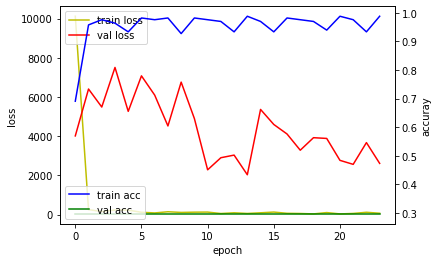

In [13]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()